<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

A startup company with 20 employees recorded their annual salaries (in INR Lakhs):
`[6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]`

(a) Calculate the mean, median, and mode of the salaries.

(b) Determine the range, variance, and standard deviation of the salaries.

(c) Calculate the Interquartile Range (IQR). What does the IQR tell you about the salary distribution?

(d) Construct a box plot for the salaries. Identify any potential outliers.


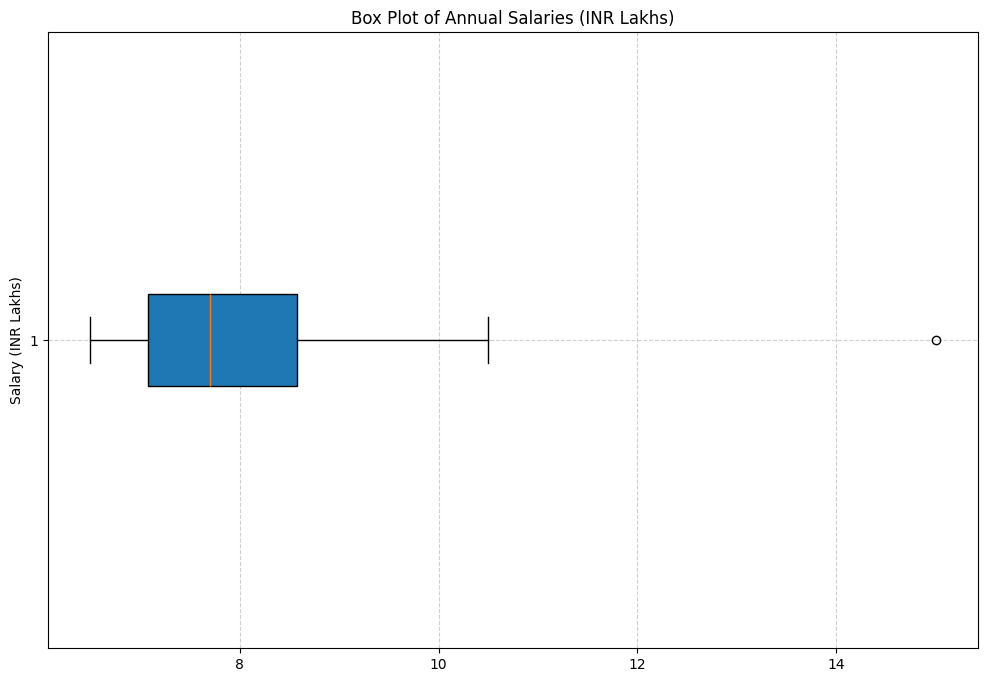

=== Salary Statistics ===
Mean: 8.19 Lakhs
Median: 7.70 Lakhs
Mode: 6.50 Lakhs
Range: 8.50 Lakhs
Variance: 3.62 (Lakhs^2)
Standard Deviation: 1.90 Lakhs
Q1 (25th Percentile): 7.07 Lakhs
Q3 (75th Percentile): 8.57 Lakhs
IQR: 1.50 Lakhs.It saying that most of the salaries are within the range of  7.07 Lakhs and  8.57 Lakhs and thier pay differences are consistent.Few people are earning significantly more than the others, which is evident from the outliers.
Outliers: [15.]


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given salaries (in INR Lakhs)
salaries = np.array([6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9,
                     7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6])

# (a) Mean, Median, and Mode
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
mode_salary = stats.mode(salaries, keepdims=True).mode[0]

# (b) Range, Variance, Standard Deviation
salary_range = np.max(salaries) - np.min(salaries)
variance_salary = np.var(salaries, ddof=1)       # sample variance
std_dev_salary = np.std(salaries, ddof=1)        # sample standard deviation

# (c) Interquartile Range (IQR)
Q1 = np.percentile(salaries, 25)
Q3 = np.percentile(salaries, 75)
IQR = Q3 - Q1

# Outlier detection (1.5*IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = salaries[(salaries < lower_bound) | (salaries > upper_bound)]

# (d) Box plot
plt.figure(figsize=(12, 8))
plt.boxplot(salaries, vert=False, patch_artist=True)
plt.title("Box Plot of Annual Salaries (INR Lakhs)")
plt.ylabel("Salary (INR Lakhs)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print Results
print("=== Salary Statistics ===")
print(f"Mean: {mean_salary:.2f} Lakhs")
print(f"Median: {median_salary:.2f} Lakhs")
print(f"Mode: {mode_salary:.2f} Lakhs")
print(f"Range: {salary_range:.2f} Lakhs")
print(f"Variance: {variance_salary:.2f} (Lakhs^2)")
print(f"Standard Deviation: {std_dev_salary:.2f} Lakhs")
print(f"Q1 (25th Percentile): {Q1:.2f} Lakhs")
print(f"Q3 (75th Percentile): {Q3:.2f} Lakhs")
print(f"IQR: {IQR:.2f} Lakhs.It saying that most of the salaries are within the range of {Q1: .2f} Lakhs and {Q3: .2f} Lakhs and thier pay differences are consistent.Few people are earning significantly more than the others, which is evident from the outliers.")
print(f"Outliers: {outliers if len(outliers) > 0 else 'None'}")

### Problem-2

A tech company conducted a customer satisfaction survey, rating their latest product on a scale of 1 to 10 (10 being highly satisfied). The scores from 30 randomly selected customers are:
[7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

(a) Create a frequency distribution table for these scores.

(b) Plot a histogram of the customer satisfaction scores. Describe the shape of the distribution (e.g., symmetric, skewed).

(c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

(d) Calculate the excess kurtosis for this data using sample kurtosis formula. What does the kurtosis value suggest about the tails of the distribution?

=== (a) Frequency Distribution Table ===
5     2
6     4
7     9
8     8
9     5
10    2
Name: count, dtype: int64


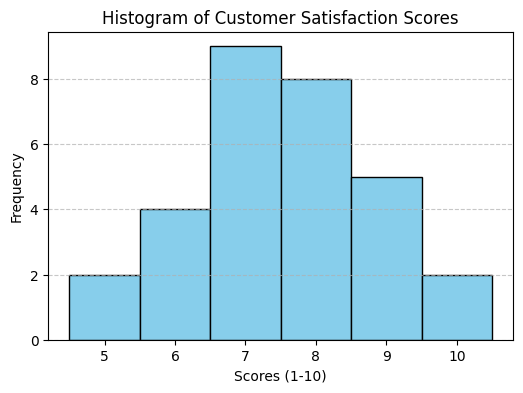


=== (c) Pearson's Coefficients of Skewness ===
Mean: 7.53
Median: 7.50
Mode: 7
Standard Deviation: 1.31
Pearson's First Coefficient: 0.408
Pearson's Second Coefficient: 0.077

=== (d) Excess Kurtosis ===
Excess Kurtosis: -0.381


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# ===============================
# Given Customer Satisfaction Scores
# ===============================
scores = np.array([
    7, 8, 9, 6, 7, 8, 10, 5, 7, 8,
    9, 7, 6, 8, 7, 9, 10, 6, 7, 8,
    5, 9, 8, 7, 6, 7, 8, 9, 7, 8
])

# ===============================
# (a) Frequency Distribution Table
# ===============================
freq_table = pd.Series(scores).value_counts().sort_index()
print("=== (a) Frequency Distribution Table ===")
print(freq_table)

# ===============================
# (b) Histogram
# ===============================
plt.figure(figsize=(6, 4))
plt.hist(scores, bins=np.arange(4.5, 10.6, 1), edgecolor='black', color='skyblue')
plt.title("Histogram of Customer Satisfaction Scores")
plt.xlabel("Scores (1-10)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ===============================
# (c) Pearson's Coefficients of Skewness
# ===============================
mean_score = np.mean(scores)
median_score = np.median(scores)
mode_score = stats.mode(scores, keepdims=False)
std_dev_score = np.std(scores, ddof=1)

pearson_first = (mean_score - mode_score.mode) / std_dev_score
pearson_second = 3 * (mean_score - median_score) / std_dev_score

print("\n=== (c) Pearson's Coefficients of Skewness ===")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Mode: {mode_score.mode}")
print(f"Standard Deviation: {std_dev_score:.2f}")
print(f"Pearson's First Coefficient: {pearson_first:.3f}")
print(f"Pearson's Second Coefficient: {pearson_second:.3f}")

# ===============================
# (d) Excess Kurtosis
# ===============================
excess_kurtosis = stats.kurtosis(scores, fisher=True, bias=False)

print("\n=== (d) Excess Kurtosis ===")
print(f"Excess Kurtosis: {excess_kurtosis:.3f}")

### Problem-3

A marketing team wants to understand the relationship between their monthly advertising expenditure (in INR Lakhs) and corresponding sales revenue (in INR Lakhs) over the last 10 months.

| Month | Advertising Spend (X) | Sales Revenue (Y) |
|-------|-----------------------|-------------------|
|     1 |                     5 |                52 |
|     2 |                     7 |                65 |
|     3 |                     6 |                60 |
|     4 |                     8 |                70 |
|     5 |                     5 |                55 |
|     6 |                     9 |                75 |
|     7 |                     7 |                68 |
|     8 |                    10 |                80 |
|     9 |                     6 |                58 |
|    10 |                     8 |                72 |


(a) Calculate the covariance between advertising spend and sales revenue.

(b) Plot Sales Revenue vs Advertising spent.

(c) Calculate the Pearson correlation coefficient between advertising spend and sales revenue.

(d) Interpret the meaning of both the covariance and the correlation coefficient in the context of this data.

Covariance between advertising spend and sales revenue: 13.45


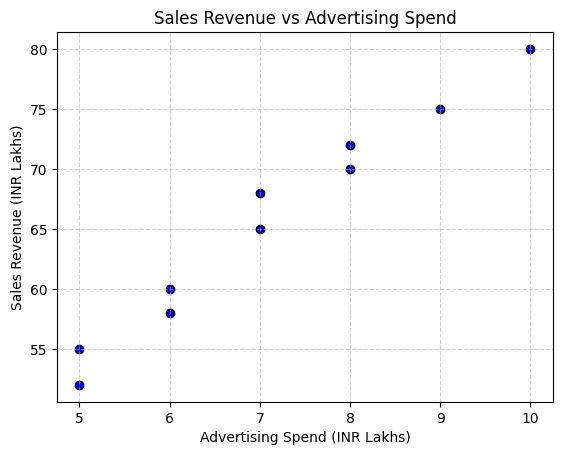

Pearson correlation coefficient: 0.99

Interpretation:
- Covariance (13.45): Indicates that as advertising spend increases, sales revenue tends to increase.
- Correlation (0.99): Indicates a strong positive linear relationship.

Mean Advertising Spend: 7.10, Mean Sales Revenue: 65.50
Std Dev Advertising Spend: 1.58, Std Dev Sales Revenue: 8.65


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([5, 7, 6, 8, 5, 9, 7, 10, 6, 8])
Y = np.array([52, 65, 60, 70, 55, 75, 68, 80, 58, 72])

# (a) Calculate covariance
mean_X = np.mean(X)
mean_Y = np.mean(Y)
cov_matrix = np.cov(X, Y, bias=True)  # bias=True for population covariance (divide by N)
cov_XY = cov_matrix[0, 1]
print("Covariance between advertising spend and sales revenue: {:.2f}".format(cov_XY))

# (b) Plot Sales Revenue vs Advertising spent
plt.scatter(X, Y, color='blue', edgecolor='k')
plt.xlabel("Advertising Spend (INR Lakhs)")
plt.ylabel("Sales Revenue (INR Lakhs)")
plt.title("Sales Revenue vs Advertising Spend")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# (c) Pearson correlation coefficient
corr_matrix = np.corrcoef(X, Y)
pearson_r = corr_matrix[0, 1]
print("Pearson correlation coefficient: {:.2f}".format(pearson_r))

# (d) Interpretation
if cov_XY > 0:
    covar_trend = "as advertising spend increases, sales revenue tends to increase."
elif cov_XY < 0:
    covar_trend = "as advertising spend increases, sales revenue tends to decrease."
else:
    covar_trend = "there is no linear relationship between advertising spend and sales revenue."

print("\nInterpretation:")
print(f"- Covariance ({cov_XY:.2f}): Indicates that {covar_trend}")
print(f"- Correlation ({pearson_r:.2f}): Indicates a {'strong' if abs(pearson_r) > 0.7 else 'weak'} positive linear relationship.")

# Optional: Print means and standard deviations
print("\nMean Advertising Spend: {:.2f}, Mean Sales Revenue: {:.2f}".format(mean_X, mean_Y))
print("Std Dev Advertising Spend: {:.2f}, Std Dev Sales Revenue: {:.2f}".format(np.std(X), np.std(Y)))


### Problem-4

A traffic department claims that the average daily commute time for residents in a certain city is 45 minutes. A researcher believes this claim is too low and collects data from a random sample of 100 residents. The sample mean commute time is 48 minutes with a standard deviation of 12 minutes.

(a) Formulate the null and alternative hypotheses for this scenario.

(b) Construct a 95% confidence interval for the true average daily commute time.

(c) Based on the confidence interval, what can you conclude about the traffic department's claim?

In [3]:
import numpy as np
from scipy import stats

# Given data
sample_mean = 48
sample_std = 12
n = 100
claimed_mean = 45
confidence = 0.95

# (a) Hypotheses (as comments)
# H0: μ = 45   (Traffic dept's claim)
# H1: μ > 45   (Researcher believes true mean shpuld be high than claimed mean > 45)

# (b) 95% confidence interval
alpha = 1 - confidence
z_star = stats.norm.ppf(1 - alpha/2)  # 1.96 for 95% CI
se = sample_std / np.sqrt(n)
lower = sample_mean - z_star * se
upper = sample_mean + z_star * se

print('95% Confidence Interval: ({:.2f}, {:.2f}) minutes'.format(lower, upper))

# (c) Conclusion
if claimed_mean > lower and claimed_mean < upper:
    print("Conclusion: The claimed mean commute time (45 min) falls inside the confidence interval; the data does NOT contradict the traffic department's claim.")
else:
    print("Conclusion: The claimed mean commute time (45 min) falls outside the confidence interval; the data suggests the true average is likely higher than 45 minutes.So we are rejecting the null hypothesis H0 in favor of the alternative hypothesis H1.")

# For reference, print z*
print(f'z* value for 95% confidence: {z_star:.2f}')

95% Confidence Interval: (45.65, 50.35) minutes
Conclusion: The claimed mean commute time (45 min) falls outside the confidence interval; the data suggests the true average is likely higher than 45 minutes.So we are rejecting the null hypothesis H0 in favor of the alternative hypothesis H1.
z* value for 95% confidence: 1.96


### Problem-5

A manufacturing company wants to estimate the average number of units produced per hour by a new machine. They take 36 random observations and find the sample mean to be 150 units with a sample standard deviation of 15 units.

(a) What is the point estimate for the true average number of units produced per hour?

(b) Construct a 99% confidence interval for the true average number of units produced per hour.

(c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

In [5]:
import numpy as np
from scipy.stats import norm
import math

# Given data
sample_mean = 150
sample_std = 15
n = 36
confidence = 0.99
E = 3  # desired margin of error for part (c)

# (a) Point estimate
print(f"(a) Point estimate for the true mean: {sample_mean} units/hour")

# (b) 99% confidence interval
alpha = 1 - confidence
z_star = norm.ppf(1 - alpha/2)
se = sample_std / np.sqrt(n)
margin_of_error = z_star * se
lower = sample_mean - margin_of_error
upper = sample_mean + margin_of_error
print(f"(b) 99% Confidence Interval: ({lower:.2f}, {upper:.2f}) units/hour")

# (c) Required sample size for desired precision (within 3 units, 99% confidence)
required_n = ( (z_star * sample_std) / E ) ** 2
required_n_ceil = math.ceil(required_n)
print(f"(c) Required sample size: {required_n_ceil}")

# For reference, print z*
print(f"z* value for 99% confidence: {z_star:.3f}")


(a) Point estimate for the true mean: 150 units/hour
(b) 99% Confidence Interval: (143.56, 156.44) units/hour
(c) Required sample size: 166
z* value for 99% confidence: 2.576


### Problem-6

A website designer believes that a new website redesign will increase the average time users spend on the site. Before the redesign, the average time spent was 3.5 minutes. After the redesign, a random sample of 50 users showed an average time of 3.8 minutes with a standard deviation of 1.0 minute.

(a) Perform a one-sided hypothesis test at a 0.05 significance level to determine if the redesign significantly increased the average time spent.

(b) State your null and alternative hypotheses, calculate the test statistic, and determine the p-value.

(c) What is your conclusion regarding the website redesign's impact?

In [10]:
import numpy as np
from scipy.stats import norm

# Given data
mu_0 = 3.5           # old site mean
sample_mean = 3.8    # new site sample mean
sample_std = 1.0     # sample standard deviation
n = 50               # sample size
alpha = 0.05         # significance level

# (b) Hypotheses (in comments):
# H0: mu = 3.5
# H1: mu > 3.5

# Calculate test statistic (z)
se = sample_std / np.sqrt(n)
z = (sample_mean - mu_0) / se
# Calculate p-value (one-sided, right tail)
p_value = 1 - norm.cdf(z)

print(f"Test statistic (z): {z:.2f}")
print(f"p-value: {p_value:.3f}")

# (c) Conclusion
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The redesign significantly increased the average time spent on the site.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant increase detected.")


Test statistic (z): 2.12
p-value: 0.017
Conclusion: Reject the null hypothesis. The redesign significantly increased the average time spent on the site.


### Problem-7

A company implemented a new training program to improve employee productivity. To assess its effectiveness, 15 employees' productivity scores were recorded before and after the training program. The scores are as follows:

| Employee | Before Training | After Training |
|----------|-----------------|----------------|
|        1 |              65 |             70 |
|        2 |              70 |             72 |
|        3 |              60 |             68 |
|        4 |              75 |             73 |
|        5 |              80 |             85 |
|        6 |              68 |             70 |
|        7 |              72 |             75 |
|        8 |              62 |             65 |
|        9 |              78 |             80 |
|       10 |              70 |             72 |
|       11 |              66 |             69 |
|       12 |              73 |             76 |
|       13 |              64 |             67 |
|       14 |              71 |             74 |
|       15 |              69 |             71 |

(a) State the null and alternative hypotheses to test if the training program significantly improved productivity.

(b) Conduct a paired samples t-test at a 0.05 significance level. Calculate the test statistic and the p-value.

(c) Based on your analysis, did the training program effectively improve employee productivity?

In [11]:
import numpy as np
from scipy.stats import ttest_rel

# Data
before = np.array([65, 70, 60, 75, 80, 68, 72, 62, 78, 70, 66, 73, 64, 71, 69])
after  = np.array([70, 72, 68, 73, 85, 70, 75, 65, 80, 72, 69, 76, 67, 74, 71])

# Paired differences
diffs = after - before

# Descriptive stats
mean_diff = np.mean(diffs)
std_diff = np.std(diffs, ddof=1)
n = len(diffs)

# Paired t-test (scipy returns two-sided p-value)
t_stat, p_value_two_sided = ttest_rel(after, before)

# One-sided p-value (alternative: after > before)
p_value_one_sided = p_value_two_sided / 2 if t_stat > 0 else 1 - p_value_two_sided/2

print(f"(a) Null hypothesis:      Mean difference (after - before) <= 0")
print(f"    Alternative:         Mean difference (after - before) > 0")

print(f"\n(b) Paired t-test statistic: {t_stat:.3f}")
print(f"    Mean difference:         {mean_diff:.3f}")
print(f"    Standard deviation:      {std_diff:.3f}")
print(f"    Sample size:             {n}")
print(f"    One-sided p-value:       {p_value_one_sided:.4f}")

# (c) Conclusion
alpha = 0.05
if p_value_one_sided < alpha:
    print("\nConclusion: Reject the null hypothesis. The training program significantly improved employee productivity.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No significant evidence that the training improved productivity.")


(a) Null hypothesis:      Mean difference (after - before) <= 0
    Alternative:         Mean difference (after - before) > 0

(b) Paired t-test statistic: 5.358
    Mean difference:         2.933
    Standard deviation:      2.120
    Sample size:             15
    One-sided p-value:       0.0001

Conclusion: Reject the null hypothesis. The training program significantly improved employee productivity.


### Problem-8

A battery manufacturer claims that their new 'ProLife' battery lasts longer than their existing 'Standard' battery. A consumer watchdog organization tests 40 'ProLife' batteries and 50 'Standard' batteries. The results are:

ProLife: Sample mean life = 120 hours, Sample standard deviation = 10 hours

Standard: Sample mean life = 115 hours, Sample standard deviation = 12 hours

(a) State the null and alternative hypotheses for testing the manufacturer's claim.

(b) Perform a z-test for two independent means at a 0.02 significance level.

(c) What is your conclusion regarding the manufacturer's claim about the 'ProLife' battery?

In [ ]:
import numpy as np
from scipy.stats import norm

# Given data
n1, mean1, std1 = 40, 120, 10   # ProLife
n2, mean2, std2 = 50, 115, 12   # Standard
alpha = 0.02

# (a) Hypotheses (in code comments)
# H0: mu_ProLife <= mu_Standard
# H1: mu_ProLife > mu_Standard

# (b) Calculate standard error
SE = np.sqrt((std1**2) / n1 + (std2**2) / n2)
# Z-statistic
z = (mean1 - mean2) / SE
# p-value (one-sided test)
p_value = 1 - norm.cdf(z)

print(f"Z-statistic: {z:.3f}")
print(f"One-sided p-value: {p_value:.4f}")

# (c) Conclusion
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is evidence that 'ProLife' battery lasts longer than the 'Standard' battery.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No evidence that 'ProLife' battery lasts longer than the 'Standard' battery.")


Z-statistic: 2.156
One-sided p-value: 0.0156
Conclusion: Reject the null hypothesis. There is evidence that 'ProLife' battery lasts longer than the 'Standard' battery.


### Problem-9

A popular restaurant chain claims that the average waiting time for a table on weekends is no more than 20 minutes. A local food critic believes it's longer. They record the waiting times (in minutes) for 30 randomly selected tables on various weekends:

`[22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]`

(a) Calculate the sample mean and sample standard deviation of the waiting times.

(b) Conduct a one-sided t-test at a 0.01 significance level to assess the food critic's belief.

(c) State your null and alternative hypotheses, calculate the test statistic, and determine the critical value.

(d) Based on your findings, what can you tell the food critic?

In [16]:
##(a) Calculate the sample mean and sample standard deviation of the waiting times.
data = [22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # sample std

print(f"Sample mean: {sample_mean:.2f} minutes")
print(f"Sample std deviation: {sample_std:.2f} minutes")

##(b) Conduct a one-sided t-test at a 0.01 significance level to assess the food critic's belief.

from scipy.stats import t

n = len(data)
mu0 = 20

# t-statistic
t_stat = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# p-value (one-sided, mean > 20)
from scipy.stats import t as t_dist
p_value = 1 - t_dist.cdf(t_stat, df=n-1)

print(f"t statistic: {t_stat:.3f}")
print(f"one-sided p-value: {p_value:.4f}")

##(c) State your null and alternative hypotheses, calculate the test statistic, and determine the critical value.
##Null Hypothesis (H0): The mean waiting time is less than or equal to 20 minutes (μ ≤ 20).
##Alternative Hypothesis (H1): The mean waiting time is greater than 20 minutes (μ > 20).
alpha = 0.01
t_critical = t.ppf(1 - alpha, df=n-1)
print(f"Critical t-value (α=0.01, df={n-1}): {t_critical:.3f}")

##(d) Based on your findings, what can you tell the food critic?
if t_stat > t_critical:
    print("Conclusion: Reject the null hypothesis. Evidence suggests the average waiting time is longer than 20 minutes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No strong evidence the average waiting time is longer than 20 minutes.")

Sample mean: 24.37 minutes
Sample std deviation: 3.93 minutes
t statistic: 6.092
one-sided p-value: 0.0000
Critical t-value (α=0.01, df=29): 2.462
Conclusion: Reject the null hypothesis. Evidence suggests the average waiting time is longer than 20 minutes.


### Problem-10

A software company is launching a new application and offers three different subscription tiers (Basic, Premium, Elite), each with varying features. Before the full launch, they conduct a pilot study to see if there's an association between a customer's age group and their preferred subscription tier. They surveyed 300 randomly selected potential customers and recorded their age group and preferred tier:

| Age Group   | Basic | Premium | Elite | Total |
|-------------|-------|---------|-------|-------|
| 18-29 years |    45 |      60 | 15    | 120   |
| 30-49 years |    30 |      50 | 20    | 100   |
|   50+ years |    25 |      40 | 15    | 80    |
|       Total |   100 |     150 | 50    | 300   |


(a) State the null and alternative hypotheses for the test of independence in this context.

(b) Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.

(c) Calculate the chi-square test statistic.

(d) Using a significance level of α=0.05, determine the critical value for this test.

(e) What is your conclusion? Is there a significant association between a customer's age group and their preferred subscription tier? Justify your answer based on your calculated chi-square statistic and the critical value.

In [17]:
import numpy as np
from scipy.stats import chi2

# Observed frequencies
observed = np.array([
    [45, 60, 15],
    [30, 50, 20],
    [25, 40, 15]
])

row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.sum()

# (b) Calculate expected frequencies
expected = np.outer(row_totals, col_totals) / grand_total

print("(b) Expected frequencies:")
print(np.round(expected, 2))

# (c) Chi-square statistic
chi2_stat = ((observed - expected) ** 2 / expected).sum()
print(f"\n(c) Chi-square statistic: {chi2_stat:.3f}")

# (d) Degrees of freedom and critical value
alpha = 0.05
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)
critical_value = chi2.ppf(1 - alpha, df)
print(f"(d) Degrees of freedom: {df}")
print(f"    Critical value (alpha=0.05): {critical_value:.3f}")

# (e) Conclusion
print("\n(e) Conclusion:")
if chi2_stat > critical_value:
    print("Reject the null hypothesis. There IS a significant association between age group and subscription tier.")
else:
    print("Fail to reject the null hypothesis. There is NO significant association between age group and subscription tier.")

# Optional: print all expected frequencies and observed for easy comparison
print('\nObserved Frequencies:')
print(observed)
print('\nExpected Frequencies:')
print(np.round(expected, 2))


(b) Expected frequencies:
[[40.   60.   20.  ]
 [33.33 50.   16.67]
 [26.67 40.   13.33]]

(c) Chi-square statistic: 3.188
(d) Degrees of freedom: 4
    Critical value (alpha=0.05): 9.488

(e) Conclusion:
Fail to reject the null hypothesis. There is NO significant association between age group and subscription tier.

Observed Frequencies:
[[45 60 15]
 [30 50 20]
 [25 40 15]]

Expected Frequencies:
[[40.   60.   20.  ]
 [33.33 50.   16.67]
 [26.67 40.   13.33]]


### Bonus Problem

An e-commerce company is testing two different designs for its product pages (Design A and Design B) to see if one leads to significantly higher conversion rates (percentage of visitors who make a purchase). They randomly assigned 50,000 website visitors to see Design A and another 50,000 visitors to see Design B over a two-week period. At the end of the period, they collected data on the conversion rates. Due to data collection specifics, they have daily average conversion rates for 30 randomly selected days for each design, rather than individual visitor data.

Here are the summary statistics for the daily average conversion rates (in percentage points):

* Design A (Sample 1):

    - Number of days ($n_A$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_A$) = 2.85%
    - Sample Standard Deviation ($s_A$) = 0.45%

* Design B (Sample 2):

    - Number of days ($n_B$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_B$) = 3.05%
    - Sample Standard Deviation ($s_B$) = 0.60%

The company is concerned that the variability in conversion rates might differ between the two designs due to different aesthetic elements or backend processes.

(a) State the null and alternative hypotheses to test if there is a significant difference in the average daily conversion rates between Design A and Design B. (Consider a two-tailed test, as they are looking for any significant difference).

(b) Before performing the t-test, you need to decide whether to assume equal or unequal population variances. For the purpose of this problem, assume that a prior test suggests unequal population variances.

(c) Calculate the appropriate test statistic (t-value) for comparing the two independent means, assuming equal population variances. Show all steps of your calculation.

(d) Determine the degrees of freedom for this test. 

(e) Using a significance level of α=0.05, determine the critical value(s) for your test.

(f) Based on your calculated test statistic and the critical value(s), what is your conclusion? Is there a statistically significant difference in the average daily conversion rates between Design A and Design B?

(g) Construct a 95% confidence interval for the difference between the true mean daily conversion rates $(μ_B - μ_A)$. Interpret this interval in the context of the problem.

In [18]:
import numpy as np
from scipy.stats import t

# Given data
n_A = 30
xbar_A = 2.85  # Mean of A (%)
s_A = 0.45     # Std dev of A (%)

n_B = 30
xbar_B = 3.05  # Mean of B (%)
s_B = 0.60     # Std dev of B (%)

alpha = 0.05

# (c) Pooled variance
sp2 = (((n_A - 1) * s_A**2) + ((n_B - 1) * s_B**2)) / (n_A + n_B - 2)
sp = np.sqrt(sp2)

# Standard error
SE = sp * np.sqrt(1/n_A + 1/n_B)

# t statistic
t_stat = (xbar_B - xbar_A) / SE

print(f"Pooled variance: {sp2:.4f}")
print(f"Pooled std dev (sp): {sp:.4f}")
print(f"Standard error (SE): {SE:.4f}")
print(f"t statistic: {t_stat:.3f}")

# (d) Degrees of freedom
df = n_A + n_B - 2
print(f"Degrees of freedom: {df}")

# (e) Critical t-value for two-tailed test
t_crit = t.ppf(1 - alpha/2, df)
print(f"Critical t-value (two-tailed, alpha=0.05): ±{t_crit:.3f}")

# (f) Conclusion
if abs(t_stat) > t_crit:
    print("Conclusion: Reject the null hypothesis. There IS a statistically significant difference in conversion rates.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is NO statistically significant difference in conversion rates.")

# (g) 95% confidence interval for (mu_B - mu_A)
margin_of_error = t_crit * SE
ci_lower = (xbar_B - xbar_A) - margin_of_error
ci_upper = (xbar_B - xbar_A) + margin_of_error
print(f"95% Confidence Interval for (mu_B - mu_A): ({ci_lower:.3f}%, {ci_upper:.3f}%)")


Pooled variance: 0.2812
Pooled std dev (sp): 0.5303
Standard error (SE): 0.1369
t statistic: 1.461
Degrees of freedom: 58
Critical t-value (two-tailed, alpha=0.05): ±2.002
Conclusion: Fail to reject the null hypothesis. There is NO statistically significant difference in conversion rates.
95% Confidence Interval for (mu_B - mu_A): (-0.074%, 0.474%)
